In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
data= pd.read_csv('./main_data.csv', index_col=[0])

In [ ]:
data

,GiaTien,Hang,DongXe,NamSanXuat,SoKmDaDi,TinhTrang,HopSo,NhienLieu,XuatXu,KieuDang,SoCho,DiaDiem
0,458000000,chevrolet,colorado,2017,35000,Cũ,Số sàn,Dầu,Nhập khẩu,Pick-up (bán tải),5,Hồ Chí Minh
1,624000000,toyota,innova,2017,32000,Cũ,Tự động,Xăng,Trong nước,Minivan (MPV),7,Bình Dương
2,275000000,kia,morning,2019,1100,Cũ,Số sàn,Xăng,Trong nước,Hatchback,5,Hà Nội
3,235000000,kia,morning,2017,38,Cũ,Số sàn,Xăng,Trong nước,Hatchback,5,Thanh Hóa
4,258000000,kia,morning,2018,4000,Cũ,Số sàn,Xăng,Trong nước,Hatchback,5,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...
37481,10280000000,lexus,lx_570,2020,0,Mới,Tự động,Xăng,Nhập khẩu,SUV,8,Hồ Chí Minh
37482,2039000000,mercedes_benz,other,2020,0,Mới,Tự động,Xăng,Trong nước,SUV,5,Cần Thơ
37483,597000000,ford,ecosport,2020,0,Mới,Tự động,Xăng,Trong nước,SUV,5,Hồ Chí Minh
37484,9099000000,lexus,lx_570,2020,0,Mới,Tự động,Xăng,Nhập khẩu,SUV,7,Hồ Chí Minh


### Build and Train model

In [5]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
data = pd.get_dummies(data, columns=['TinhTrang', 'Hang', 'DongXe', 'DiaDiem', 'XuatXu', 'KieuDang', 'NhienLieu', 'HopSo'])

In [7]:
data

,GiaTien,NamSanXuat,SoKmDaDi,SoCho,TinhTrang_Cũ,TinhTrang_Mới,Hang_acura,Hang_alfa romeo,Hang_asia,Hang_audi,...,KieuDang_Van,KieuDang_Wagon,NhienLieu_Dầu,NhienLieu_Hỗn hợp,NhienLieu_Xăng,NhienLieu_Điện,NhienLieu_Động cơ Hybrid,HopSo_Bán tự động,HopSo_Số sàn,HopSo_Tự động
0,458000000,2017,35000,5,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,624000000,2017,32000,7,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,275000000,2019,1100,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,235000000,2017,38,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,258000000,2018,4000,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37481,10280000000,2020,0,8,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
37482,2039000000,2020,0,5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
37483,597000000,2020,0,5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
37484,9099000000,2020,0,7,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
namSanXuat = [i for i in data['NamSanXuat']]
data['Tuoi'] = [2020 - int(i) for i in namSanXuat]

In [ ]:
data = data.drop('NamSanXuat', axis=1)

In [ ]:
stats = data.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
GiaTien,37486.0,1.313933e+09,8.138104e+10,0.0,300000000.0,489000000.0,710000000.0,1.109900e+13
SoKmDaDi,37486.0,5.563764e+04,1.035705e+05,0.0,40.0,30000.0,70000.0,1.000000e+06
SoCho,37486.0,5.665608e+00,1.702507e+00,2.0,5.0,5.0,7.0,2.900000e+01
TinhTrang_Cũ,37486.0,7.745292e-01,4.178976e-01,0.0,1.0,1.0,1.0,1.000000e+00
TinhTrang_Mới,37486.0,2.254708e-01,4.178976e-01,0.0,0.0,0.0,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
NhienLieu_Động cơ Hybrid,37486.0,1.307155e-03,3.613144e-02,0.0,0.0,0.0,0.0,1.000000e+00
HopSo_Bán tự động,37486.0,1.037721e-02,1.013400e-01,0.0,0.0,0.0,0.0,1.000000e+00
HopSo_Số sàn,37486.0,3.554394e-01,4.786526e-01,0.0,0.0,0.0,1.0,1.000000e+00
HopSo_Tự động,37486.0,6.341834e-01,4.816648e-01,0.0,0.0,1.0,1.0,1.000000e+00


In [ ]:
stats.to_csv('./main_stats.csv')

In [ ]:
def norm(x):
  return (x - stats['mean']) / stats['std']

In [ ]:
CHN_dataset = norm(data)

In [ ]:
CHN_dataset

,GiaTien,SoKmDaDi,SoCho,TinhTrang_Cũ,TinhTrang_Mới,Hang_acura,Hang_alfa romeo,Hang_asia,Hang_audi,Hang_baic,Hang_bentley,Hang_bmw,Hang_buick,Hang_byd,Hang_cadillac,Hang_changan,Hang_chery,Hang_chevrolet,Hang_chrysler,Hang_daewoo,Hang_daihatsu,Hang_dodge,Hang_dongben,Hang_dongfeng,Hang_ferrari,Hang_fiat,Hang_ford,Hang_geely,Hang_gmc,Hang_haima,Hang_hino,Hang_honda,Hang_hummer,Hang_hyundai,Hang_infiniti,Hang_isuzu,Hang_jac,Hang_jaguar,Hang_jeep,Hang_kia,...,DiaDiem_Tiền Giang,DiaDiem_Trà Vinh,DiaDiem_Tuyên Quang,DiaDiem_Tây Ninh,DiaDiem_Vĩnh Long,DiaDiem_Vĩnh Phúc,DiaDiem_Yên Bái,DiaDiem_Điện Biên,DiaDiem_Đà Nẵng,DiaDiem_Đắk Lắk,DiaDiem_Đắk Nông,DiaDiem_Đồng Nai,DiaDiem_Đồng Tháp,XuatXu_Nhập khẩu,XuatXu_Trong nước,KieuDang_Convertible,KieuDang_Coupe,KieuDang_Coupe (2 cửa),KieuDang_Hatchback,KieuDang_Kiểu dáng khác,KieuDang_Minivan,KieuDang_Minivan (MPV),KieuDang_Mui trần,KieuDang_Offroad,KieuDang_Pick-up (bán tải),KieuDang_Pickup,KieuDang_SUV,KieuDang_SUV / Cross over,KieuDang_Sedan,KieuDang_Van,KieuDang_Wagon,NhienLieu_Dầu,NhienLieu_Hỗn hợp,NhienLieu_Xăng,NhienLieu_Điện,NhienLieu_Động cơ Hybrid,HopSo_Bán tự động,HopSo_Số sàn,HopSo_Tự động,Tuoi
0,-0.010518,-0.199262,-0.390958,0.539536,-0.539536,-0.02734,-0.005165,-0.017132,-0.067295,-0.01033,-0.017132,-0.106702,-0.005165,-0.012652,-0.017895,-0.015496,-0.013666,4.521563,-0.01461,-0.154232,-0.034668,-0.008946,-0.005165,-0.005165,-0.005165,-0.042942,-0.364716,-0.005165,-0.005165,-0.018625,-0.005165,-0.230935,-0.005165,-0.399569,-0.01033,-0.083894,-0.005165,-0.020664,-0.012652,-0.376310,...,-0.066894,-0.028301,-0.028301,-0.082922,-0.041354,-0.064644,-0.024777,-0.018625,-0.166145,-0.126235,-0.029229,-0.186496,-0.058304,1.110527,-1.110527,-0.012652,-0.020664,-0.059218,-0.423330,-0.157997,-0.051976,-0.317303,-0.033089,-0.012652,3.715445,-0.066894,-0.154865,-0.564013,-0.771537,-0.119639,-0.01155,2.258782,-0.0213,-2.244161,-0.005165,-0.036178,-0.1024,1.346615,-1.316649,-0.372317
1,-0.008478,-0.228227,0.783780,0.539536,-0.539536,-0.02734,-0.005165,-0.017132,-0.067295,-0.01033,-0.017132,-0.106702,-0.005165,-0.012652,-0.017895,-0.015496,-0.013666,-0.221157,-0.01461,-0.154232,-0.034668,-0.008946,-0.005165,-0.005165,-0.005165,-0.042942,-0.364716,-0.005165,-0.005165,-0.018625,-0.005165,-0.230935,-0.005165,-0.399569,-0.01033,-0.083894,-0.005165,-0.020664,-0.012652,-0.376310,...,-0.066894,-0.028301,-0.028301,-0.082922,-0.041354,-0.064644,-0.024777,-0.018625,-0.166145,-0.126235,-0.029229,-0.186496,-0.058304,-0.900449,0.900449,-0.012652,-0.020664,-0.059218,-0.423330,-0.157997,-0.051976,3.151473,-0.033089,-0.012652,-0.269140,-0.066894,-0.154865,-0.564013,-0.771537,-0.119639,-0.01155,-0.442705,-0.0213,0.445589,-0.005165,-0.036178,-0.1024,-0.742583,0.759484,-0.372317
2,-0.012766,-0.526575,-0.390958,0.539536,-0.539536,-0.02734,-0.005165,-0.017132,-0.067295,-0.01033,-0.017132,-0.106702,-0.005165,-0.012652,-0.017895,-0.015496,-0.013666,-0.221157,-0.01461,-0.154232,-0.034668,-0.008946,-0.005165,-0.005165,-0.005165,-0.042942,-0.364716,-0.005165,-0.005165,-0.018625,-0.005165,-0.230935,-0.005165,-0.399569,-0.01033,-0.083894,-0.005165,-0.020664,-0.012652,2.657314,...,-0.066894,-0.028301,-0.028301,-0.082922,-0.041354,-0.064644,-0.024777,-0.018625,-0.166145,-0.126235,-0.029229,-0.186496,-0.058304,-0.900449,0.900449,-0.012652,-0.020664,-0.059218,2.362161,-0.157997,-0.051976,-0.317303,-0.033089,-0.012652,-0.269140,-0.066894,-0.154865,-0.564013,-0.771537,-0.119639,-0.01155,-0.442705,-0.0213,0.445589,-0.005165,-0.036178,-0.1024,1.346615,-1.316649,-0.710263
3,-0.013258,-0.536829,-0.390958,0.539536,-0.539536,-0.02734,-0.005165,-0.017132,-0.067295,-0.01033,-0.017132,-0.106702,-0.005165,-0.012652,-0.017895,-0.015496,-0.013666,-0.221157,-0.01461,-0.154232,-0.034668,-0.008946,-0.005165,-0.005165,-0.005165,-0.042942,-0.364716,-0.005165,-0.005165,-0.018625,-0.005165,-0.230935,-0.005165,-0.399569,-0.01033,-0.083894,-0.005165,-0.020664,-0.012652,2.657314,...,-0.066894,-0.028301,-0.028301,-0.082922,-0.041354,-0.064644,-0.024

In [ ]:
train_dataset = CHN_dataset.sample(frac=0.8,random_state=0)
test_dataset = CHN_dataset.drop(train_dataset.index)

In [ ]:
train_labels = train_dataset.pop('GiaTien')
test_labels = test_dataset.pop('GiaTien')

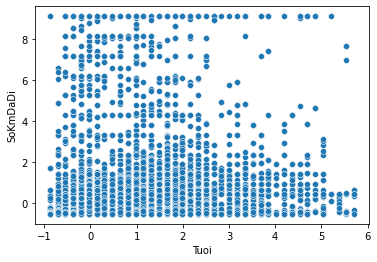

In [ ]:
sns.scatterplot(data=CHN_dataset, x="Tuoi", y="SoKmDaDi")

### SGD

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.SGD(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model1 = build_model()

In [ ]:
EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history1 = model1.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, verbose=2,
  )

Epoch 1/100
938/938 - 1s - loss: 1.1752 - mae: 0.0282 - mse: 1.1752
Epoch 2/100
938/938 - 1s - loss: 0.7281 - mae: 0.0269 - mse: 0.7281
Epoch 3/100
938/938 - 1s - loss: 0.4946 - mae: 0.0241 - mse: 0.4946
Epoch 4/100
938/938 - 1s - loss: 0.2363 - mae: 0.0218 - mse: 0.2363
Epoch 5/100
938/938 - 1s - loss: 1.1074 - mae: 0.0260 - mse: 1.1074
Epoch 6/100
938/938 - 1s - loss: 0.3380 - mae: 0.0214 - mse: 0.3380
Epoch 7/100
938/938 - 1s - loss: 0.0177 - mae: 0.0172 - mse: 0.0177
Epoch 8/100
938/938 - 1s - loss: 0.2287 - mae: 0.0201 - mse: 0.2287
Epoch 9/100
938/938 - 1s - loss: 1.1020 - mae: 0.0254 - mse: 1.1020
Epoch 10/100
938/938 - 1s - loss: 0.3281 - mae: 0.0205 - mse: 0.3281
Epoch 11/100
938/938 - 1s - loss: 0.1165 - mae: 0.0187 - mse: 0.1165
Epoch 12/100
938/938 - 1s - loss: 0.5029 - mae: 0.0222 - mse: 0.5029
Epoch 13/100
938/938 - 1s - loss: 0.8522 - mae: 0.0224 - mse: 0.8522
Epoch 14/100
938/938 - 1s - loss: 1.2008 - mae: 0.0263 - mse: 1.2008
Epoch 15/100
938/938 - 1s - loss: 0.9538 - 

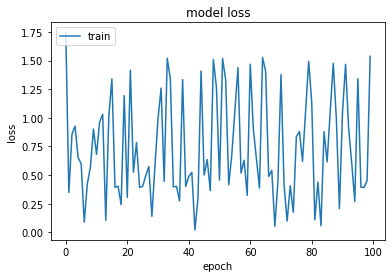

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Momentum

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()

In [ ]:
EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history2 = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, verbose=1,
  )

Epoch 1/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2504 - mae: 0.0234 - mse: 1.2504
Epoch 2/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2503 - mae: 0.0239 - mse: 1.2503
Epoch 3/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2504 - mae: 0.0236 - mse: 1.2504
Epoch 4/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2503 - mae: 0.0206 - mse: 1.2503
Epoch 5/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2504 - mae: 0.0266 - mse: 1.2504
Epoch 6/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2504 - mae: 0.0229 - mse: 1.2504
Epoch 7/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2503 - mae: 0.0245 - mse: 1.2503
Epoch 8/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2504 - mae: 0.0235 - mse: 1.2504
Epoch 9/100
938/938 [==============================] - 1s 1ms/step - loss: 1.2501 - mae: 0.0238 - mse: 1.2501
Epoch 10/1

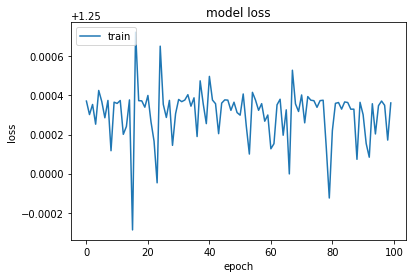

In [ ]:
plt.plot(history2.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### RMSprop

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model3 = build_model()

In [ ]:
EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history3 = model3.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, verbose=2,
  )

Epoch 1/100
938/938 - 1s - loss: 1.2464 - mae: 0.0623 - mse: 1.2464
Epoch 2/100
938/938 - 1s - loss: 1.2711 - mae: 0.0638 - mse: 1.2711
Epoch 3/100
938/938 - 1s - loss: 1.2995 - mae: 0.0684 - mse: 1.2995
Epoch 4/100
938/938 - 1s - loss: 1.3029 - mae: 0.0738 - mse: 1.3029
Epoch 5/100
938/938 - 1s - loss: 1.3622 - mae: 0.0777 - mse: 1.3622
Epoch 6/100
938/938 - 1s - loss: 1.3680 - mae: 0.0827 - mse: 1.3680
Epoch 7/100
938/938 - 1s - loss: 1.4425 - mae: 0.0915 - mse: 1.4425
Epoch 8/100
938/938 - 1s - loss: 1.3649 - mae: 0.0985 - mse: 1.3649
Epoch 9/100
938/938 - 1s - loss: 1.4326 - mae: 0.0950 - mse: 1.4326
Epoch 10/100
938/938 - 1s - loss: 1.4044 - mae: 0.0988 - mse: 1.4044
Epoch 11/100
938/938 - 1s - loss: 1.4525 - mae: 0.1164 - mse: 1.4525
Epoch 12/100
938/938 - 1s - loss: 1.5151 - mae: 0.1031 - mse: 1.5151
Epoch 13/100
938/938 - 1s - loss: 1.4162 - mae: 0.0966 - mse: 1.4162
Epoch 14/100
938/938 - 1s - loss: 1.4369 - mae: 0.0917 - mse: 1.4369
Epoch 15/100
938/938 - 1s - loss: 1.3315 - 

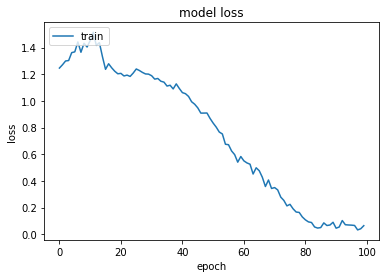

In [ ]:
plt.plot(history3.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

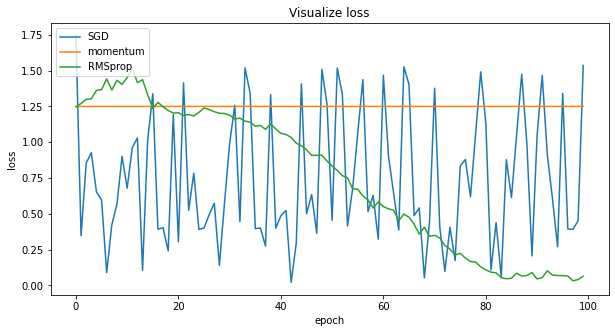

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('Visualize loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGD', 'momentum', 'RMSprop'], loc='upper left')
plt.show()

In [ ]:
model3.save("./main_model3.h5")

### Evaluation

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,1.376465,0.015342,1.376465,0.009945,0.006154,0.009945,95
96,1.306672,0.015146,1.306672,0.009765,0.004768,0.009765,96
97,1.336577,0.015368,1.336577,0.009862,0.005647,0.009862,97
98,1.374759,0.015570,1.374759,0.010452,0.007120,0.010452,98
99,1.302780,0.015560,1.302780,0.010096,0.004619,0.010096,99


In [ ]:
model3 = keras.models.load_model("/content/drive/My Drive/Project/model/main_model3.h5")

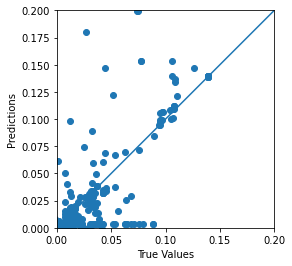

In [ ]:
test_predictions = model3.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 0.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

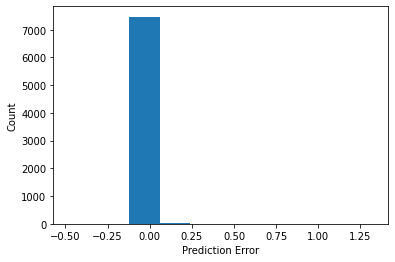

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')